# Diabetes Classification

**Diabetes is not a disease but a disorder which arise due to the improper function of the hormones insulin, and to classify wheter or not a person has diabetes. There are lot of other factors that determine the condition let us walk through the code and get a insight about the dataset.**

In [1]:
#Import the packages which are used for Data Analysis.

import pandas as pd # Data analysis.
import numpy as np #linear algebra.


#packages used for plotting 
import matplotlib.pyplot as plt
import seaborn as sns

# let us filter the warnings in this notebook.
import warnings
warnings.filterwarnings('ignore')


In [2]:
# We need to import the dataset.
filepath='archive (3)/diabetes.csv'

df=pd.read_csv(filepath) #reading the csv file and storing the value in df varibale


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Informations from the Dataset

**The diabetes dataset consist of the following columns**

- Pregnancies
- Glucose
- BloodPressure
- SkinThickness
- Insuling
- BMI(Body Mass index)
- Diabetes pedigree Function
- Age of the person
- Outcome is the 'target' variable wheter or not a person has diabetes.

In [4]:
df.info() # the dataframe . info() gives the summary of the dataset.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# hence the dataset has no NaN values or missing values.
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='Outcome', ylabel='count'>

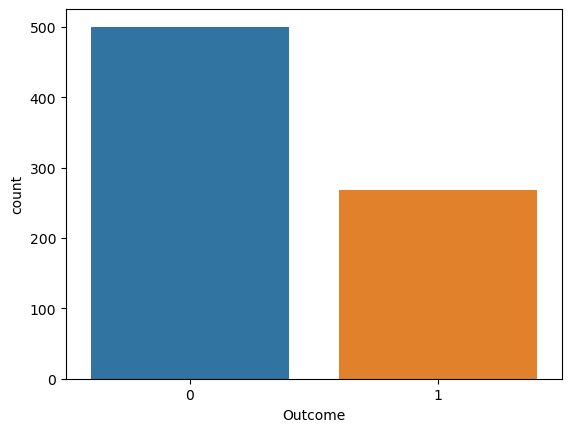

In [6]:
sns.countplot(data=df,x=df['Outcome'])

In [7]:
#let us check wheter we have plotted the data correct
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
patient = df.loc[df['Outcome']==1]
patient.shape[0]

268

In [9]:
non_patient = df.loc[df["Outcome"]==0]
non_patient.shape[0]

500

In [10]:
# we can figure out some of the interesting patterns among the patient groups.
d_patient={}
for i in patient:
    d_patient[i] = patient[i].mean()

# we need to print only the needed details so
need_list=['Glucose','BloodPressure','Insulin','Outcome','Age']
for i in d_patient:
    if i in need_list:
        print(i+"="+str(d_patient[i]))

Glucose=141.25746268656715
BloodPressure=70.82462686567165
Insulin=100.33582089552239
Age=37.06716417910448
Outcome=1.0


In [11]:
d_non_patient={}
for i in non_patient:
    d_non_patient[i] = non_patient[i].mean()

for i in d_non_patient:
    if i in need_list:
        print(i+"="+str(d_non_patient[i]))
    


Glucose=109.98
BloodPressure=68.184
Insulin=68.792
Age=31.19
Outcome=0.0


**The Glucose level and the Blood Pressure level are low compared to the  patient record**

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

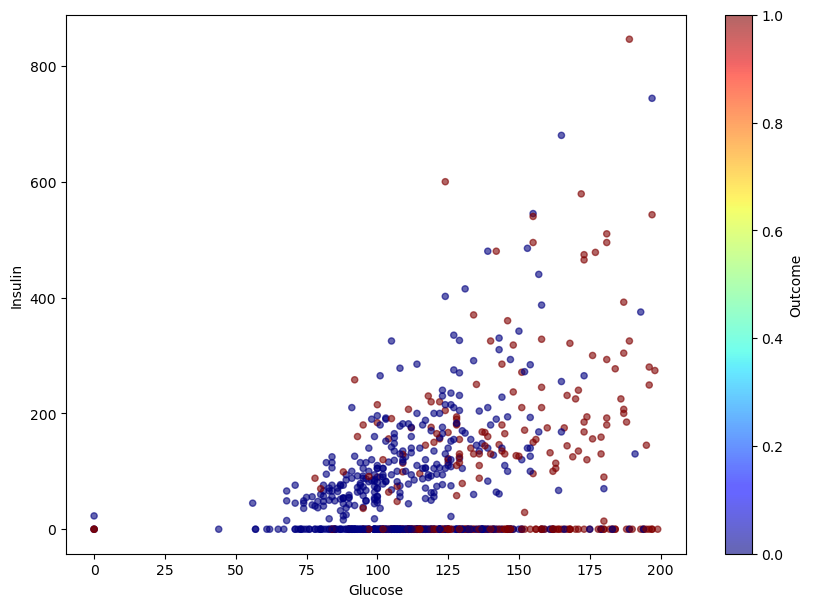

In [12]:
df.plot(kind="scatter",x="Glucose",y="Insulin",c="Outcome",figsize=(10,7),cmap=plt.get_cmap("jet"),alpha=0.6)

In [13]:
# how does a age contribute to the outcome of the diabetes.


In [14]:
#let us check for some  correlation among the dataset.
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [15]:
#let us list down some of the important parameters which are used to build the classification model
important_parameters=["Glucose","Insulin","BMI","Age"]
# these are considerably one of the important parameters to use in model.

In [16]:
# check which category of age group has most of the diabetes.
patient['Age_cat'] = pd.cut(patient['Age'],bins=[0,10,20,30,40,50,60,np.inf])

In [17]:
patient['Age_cat']

0      (40.0, 50.0]
2      (30.0, 40.0]
4      (30.0, 40.0]
6      (20.0, 30.0]
8      (50.0, 60.0]
           ...     
755    (30.0, 40.0]
757    (50.0, 60.0]
759     (60.0, inf]
761    (40.0, 50.0]
766    (40.0, 50.0]
Name: Age_cat, Length: 268, dtype: category
Categories (7, interval[float64, right]): [(0.0, 10.0] < (10.0, 20.0] < (20.0, 30.0] < (30.0, 40.0] < (40.0, 50.0] < (50.0, 60.0] < (60.0, inf]]

<AxesSubplot:>

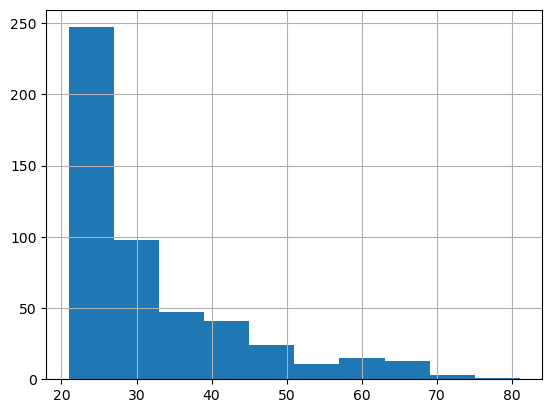

In [18]:
non_patient['Age'].hist()

In [19]:
patient['Age']

0      50
2      32
4      33
6      26
8      53
       ..
755    37
757    52
759    66
761    43
766    47
Name: Age, Length: 268, dtype: int64

<AxesSubplot:>

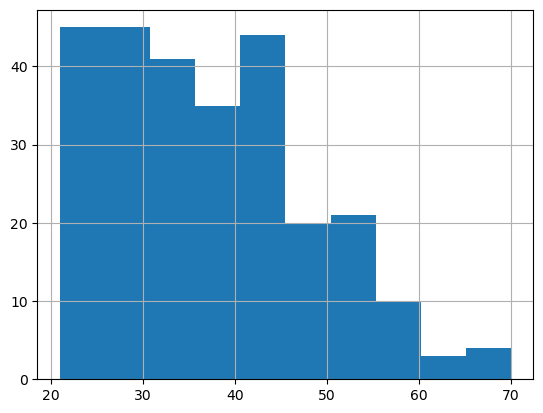

In [20]:
patient['Age'].hist()

<AxesSubplot:xlabel='Age', ylabel='count'>

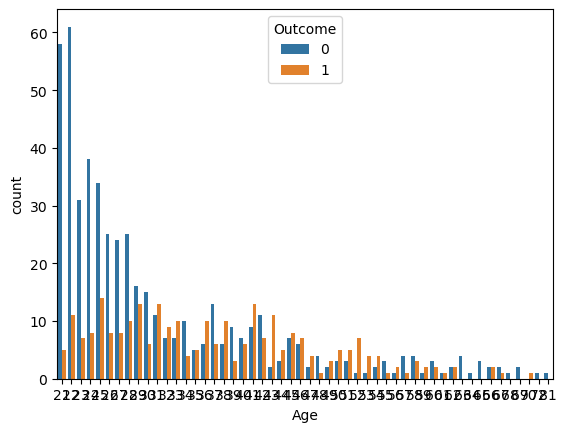

In [21]:
#let us look some of the countplot
sns.countplot(x=df['Age'],hue=df['Outcome'])

In [22]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:>

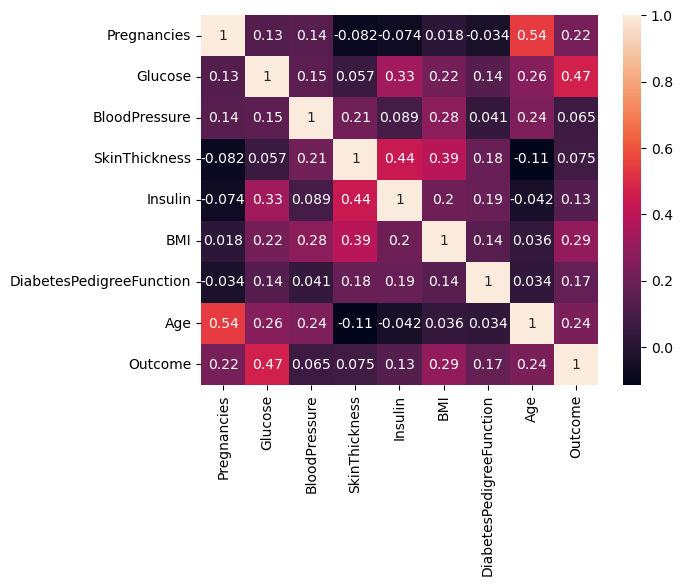

In [23]:
sns.heatmap(df.corr(),annot=True)

In [24]:
from sklearn.model_selection import train_test_split

x=df.drop("Outcome",axis=1)
y=df['Outcome']

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2,shuffle=True)

In [25]:
x_train.shape,x_test.shape

((614, 8), (154, 8))

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train,y_train)

LogisticRegression()

In [27]:
m1 = model.score(x_test,y_test)

In [28]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier()

forest_model.fit(x_train,y_train)

m2 = forest_model.score(x_test,y_test)

In [29]:
# improving the model's
model_score = [m1,m2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


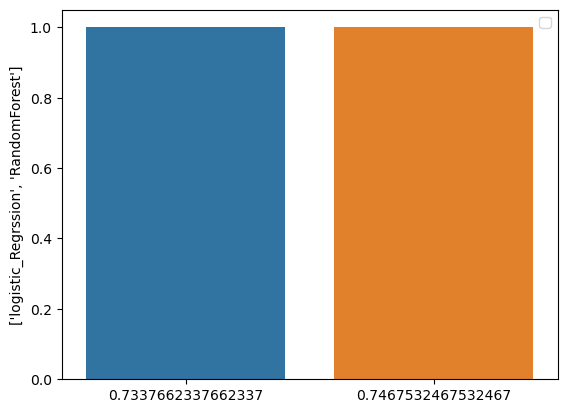

In [30]:
sns.countplot(x=model_score,)
plt.ylabel(["logistic_Regrssion","RandomForest"])
plt.legend()

# Function to Run and predict the model scores

In [31]:
#let us generally create a function to do the process

def model_fitting(x_train,y_train,x_test,y_test):
    """ model fitting is a fucntion which is used to fit the model and return the score of the model"""
    model={"Logistic_Regression" : LogisticRegression(),
           "RandomForest" : RandomForestClassifier()
          }
    np.random.seed(42)
    
    model_score={}
    
    for name,model in model.items():
        
        model.fit(x_train,y_train)
        
        model_score[name] = model.score(x_test,y_test)
    
    return model_score
        
    

In [32]:
scores = model_fitting(x_train,y_train,x_test,y_test)

In [33]:
scores = pd.DataFrame(scores,index=['Accuracy'])

scores

,Logistic_Regression,RandomForest
Accuracy,0.746753,0.720779


<AxesSubplot:>

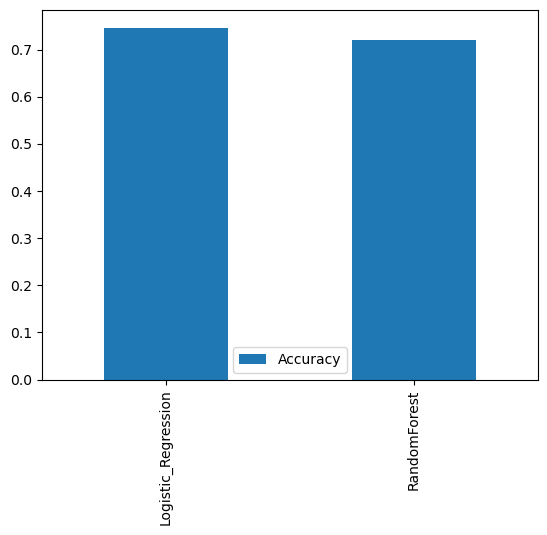

In [34]:
scores.T.plot(kind="bar")

## Imporving the model performance.

In [35]:
# there are certain ways to improve the model perfomance.
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [36]:
# using Grid Search CV
from sklearn.model_selection import GridSearchCV

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)


grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

/home/yashwanth/Desktop/sample_project_1/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/yashwanth/Desktop/sample_project_1/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

In [37]:
grid_result.best_score_

0.7703851792616286

In [38]:
# improving RandomForest
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

grid = dict(n_estimators=n_estimators,max_features=max_features)
grid_search = GridSearchCV(estimator=forest_model, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0,verbose=True)
grid_result = grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [39]:
grid_result.best_score_

0.7801679328268692

# Feature Engineering

In [40]:
# we can add new features 
Nutritional_status = pd.Series([]) 

for i in range(len(df)): 
    if df['BMI'][i] == 0.0: 
        Nutritional_status[i]="NA"
    
    elif df['BMI'][i] < 18.5: 
        Nutritional_status[i]="Underweight"
        
    elif df['BMI'][i] < 25: 
        Nutritional_status[i]="Normal"
  
    elif df['BMI'][i] >= 25 and df['BMI'][i] < 30: 
        Nutritional_status[i]="Overweight"
  
    elif df['BMI'][i] >= 30: 
        Nutritional_status[i]="Obese"
        
    else: 
        Nutritional_status[i]= pima['BMI'][i]
        
df.insert(6, "Nutritional Status", Nutritional_status)

In [41]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,Obese,0.627,50,1
1,1,85,66,29,0,26.6,Overweight,0.351,31,0
2,8,183,64,0,0,23.3,Normal,0.672,32,1
3,1,89,66,23,94,28.1,Overweight,0.167,21,0
4,0,137,40,35,168,43.1,Obese,2.288,33,1


In [46]:
df.drop("Nutritional Status",axis=1,inplace=True)

In [52]:
dataset_x = df.iloc[:,[1,2,5,7]].values
dataset_x

array([[148. ,  72. ,  33.6,  50. ],
       [ 85. ,  66. ,  26.6,  31. ],
       [183. ,  64. ,  23.3,  32. ],
       ...,
       [121. ,  72. ,  26.2,  30. ],
       [126. ,  60. ,  30.1,  47. ],
       [ 93. ,  70. ,  30.4,  23. ]])

In [53]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
dataset_scaled = sc.fit_transform(dataset_X)

In [54]:
dataset_scaled

array([[0.35294118, 0.74371859, 0.59016393, 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, 0.45305514, 0.10119556,
        0.03333333]])

In [55]:
x = dataset_x
y = df["Outcome"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [56]:
forest_model = RandomForestClassifier()

forest_model.fit(x_train,y_train)

RandomForestClassifier()

In [57]:
forest_model.score(x_test,y_test)

0.7402597402597403

In [58]:
# it is alright then we can build our pickle file
import pickle

pickle.dump(forest_model,open("model.pkl",'wb'))